In [8]:
import spikeinterface.full as si
from probeinterface.plotting import plot_probe, plot_probegroup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from scipy import stats
import os
from P2_PostProcess.VirtualReality.plotting import get_vmin_vmax, min_max_normalize
from P2_PostProcess.VirtualReality.spatial_information import calculate_spatial_information
from P1_SpikeSort.spikesort import make_recording_from_paths_and_get_times
import settings as settings
from scipy import signal




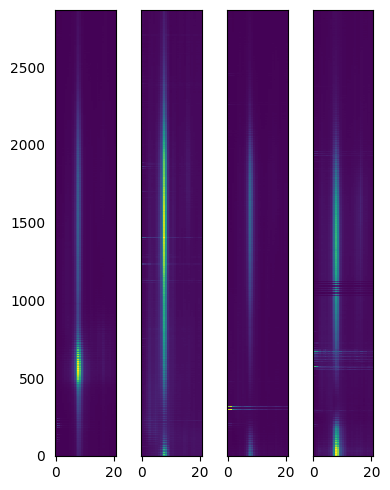

In [33]:
project_path = "/mnt/datastore/Harry/Cohort11_april2024/"
derivative_path = "/mnt/datastore/Harry/Cohort11_april2024/derivatives/"

start_time = 0
end_time = 1*60 

# get sorting analyzer and unit locations
vr_session_base_names = ["M21_D26_2024-05-28_17-04-41_VR1"]
vr_session_base_names = ["M21_D26_2024-05-28_17-04-41_VR1", "M21_D24_2024-05-26_16-35-19_VR1", "M21_D23_2024-05-25_16-54-12_VR1", "M21_D25_2024-05-27_16-00-30_VR1"]

fig, axs = plt.subplots(1, 4, figsize=(4, 5), sharey=True)

power_spectras_all = []
for i, vr_name in enumerate(vr_session_base_names):
    mouse = vr_name.split("_")[0]
    day = vr_name.split("_")[1]
    recording_path =  f"{project_path}vr/{vr_name}"
    vr_path = f"{derivative_path}{mouse}/{day}/vr/{vr_name}/processed/kilosort4/spikes.pkl"
    sorting_analyzer_path = f"{derivative_path}{mouse}/{day}/ephys/sorting_analyzer"
    spike_data_vr = pd.read_pickle(vr_path); spike_data_vr["firing_times_vr"] = spike_data_vr["firing_times"]

    recording_mono, rec_samples = make_recording_from_paths_and_get_times([recording_path])

    reordered_recording = si.depth_order(recording_mono, channel_ids=None, dimensions=('y'), flip=True)

    traces = reordered_recording.get_traces(start_frame=int(start_time * settings.sampling_rate), end_frame=int(end_time * settings.sampling_rate))
    traces = np.transpose(traces)

    power_spectras = []
    for ch_trace in traces:
        f, power_spectrum_channel = signal.welch(ch_trace, fs=settings.sampling_rate, nperseg=50000, scaling='spectrum')
        power_spectras.append((f*power_spectrum_channel))
    power_spectras = np.array(power_spectras)
    locations = np.linspace(reordered_recording.get_channel_locations()[0,1], 
                            reordered_recording.get_channel_locations()[-1, 1], 
                            num=len(reordered_recording.get_channel_locations()))
    
    X, Y = np.meshgrid(f[:35], locations)
    cmap = plt.cm.get_cmap("viridis")
    cmap.set_bad("white")
    axs[i].pcolormesh(X, Y, power_spectras[:, :35], cmap=cmap, shading="auto")
    axs[i].tick_params(axis='y', which='both', left=False, right=False)
    power_spectras_all.append(power_spectras)
plt.tight_layout()
plt.show()


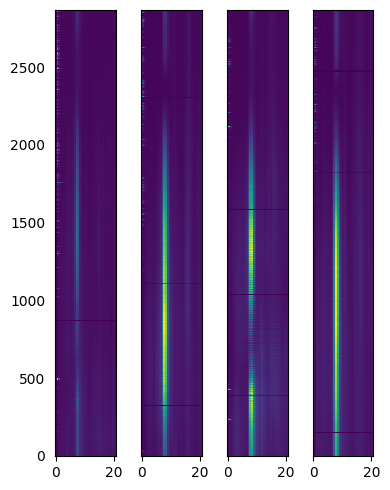

In [34]:
project_path = "/mnt/datastore/Harry/Cohort11_april2024/"
derivative_path = "/mnt/datastore/Harry/Cohort11_april2024/derivatives/"

start_time = 0
end_time = 1*60 

# get sorting analyzer and unit locations
vr_session_base_names = [
                      "M20_D23_2024-05-25_14-54-34_VR1",
                      "M20_D24_2024-05-26_14-49-32_VR1", 
                      "M20_D25_2024-05-27_14-24-21_VR1",
                      "M20_D26_2024-05-28_15-18-55_VR1"]
fig, axs = plt.subplots(1, 4, figsize=(4, 5), sharey=True)

power_spectras_all = []
for i, vr_name in enumerate(vr_session_base_names):
    mouse = vr_name.split("_")[0]
    day = vr_name.split("_")[1]
    recording_path =  f"{project_path}vr/{vr_name}"
    vr_path = f"{derivative_path}{mouse}/{day}/vr/{vr_name}/processed/kilosort4/spikes.pkl"
    sorting_analyzer_path = f"{derivative_path}{mouse}/{day}/ephys/sorting_analyzer"
    spike_data_vr = pd.read_pickle(vr_path); spike_data_vr["firing_times_vr"] = spike_data_vr["firing_times"]

    recording_mono, rec_samples = make_recording_from_paths_and_get_times([recording_path])

    reordered_recording = si.depth_order(recording_mono, channel_ids=None, dimensions=('y'), flip=True)

    traces = reordered_recording.get_traces(start_frame=int(start_time * settings.sampling_rate), end_frame=int(end_time * settings.sampling_rate))
    traces = np.transpose(traces)

    power_spectras = []
    for ch_trace in traces:
        f, power_spectrum_channel = signal.welch(ch_trace, fs=settings.sampling_rate, nperseg=50000, scaling='spectrum')
        power_spectras.append((f*power_spectrum_channel))
    power_spectras = np.array(power_spectras)
    locations = np.linspace(reordered_recording.get_channel_locations()[0,1], 
                            reordered_recording.get_channel_locations()[-1, 1], 
                            num=len(reordered_recording.get_channel_locations()))
    
    X, Y = np.meshgrid(f[:35], locations)
    cmap = plt.cm.get_cmap("viridis")
    cmap.set_bad("white")
    axs[i].pcolormesh(X, Y, power_spectras[:, :35], cmap=cmap, shading="auto")
    axs[i].tick_params(axis='y', which='both', left=False, right=False)
    power_spectras_all.append(power_spectras)
plt.tight_layout()
plt.show()
